# Food Desert Investigation -- Exploratory Data Analysis

## Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [40]:
df = pd.read_csv('clean_combined.csv')

In [41]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,200000ormore,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months
0,1001,AL,autauga,59447.5,31,0,44,0,31,0,...,11.1,13.7,17.4,11.4,11.0,3.9,3.3,46257.0,64632.0,37.8
1,1003,AL,baldwin,59447.5,118,0,156,0,236,1,...,11.1,13.7,17.4,11.4,11.0,3.9,3.3,46257.0,64632.0,37.8
2,1005,AL,barbour,59447.5,19,0,23,0,14,0,...,11.1,13.7,17.4,11.4,11.0,3.9,3.3,46257.0,64632.0,37.8
3,1007,AL,bibb,59447.5,15,0,7,0,7,0,...,11.1,13.7,17.4,11.4,11.0,3.9,3.3,46257.0,64632.0,37.8
4,1009,AL,blount,59447.5,27,0,23,0,12,0,...,11.1,13.7,17.4,11.4,11.0,3.9,3.3,46257.0,64632.0,37.8


In [42]:
df.describe()

,FIPS,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,GROC16,GROCPTH16,...,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,200000ormore,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.00000,3140.000000
mean,30387.632484,129608.522452,40.391083,0.083121,75.765924,0.050318,78.621975,0.235669,20.821975,0.017834,...,10.000096,13.622739,18.262898,12.410573,13.372834,5.061975,5.107898,55319.004777,75732.01242,34.382994
std,15156.372045,154721.098857,97.056911,0.301481,268.964930,0.252449,270.112658,0.587543,90.238333,0.148263,...,1.172243,1.185873,1.056141,0.967106,2.085244,1.453144,2.020393,7743.317417,10110.03324,2.338979
min,1001.000000,7532.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.400000,7.600000,12.900000,10.000000,9.700000,3.000000,2.500000,41754.000000,58974.00000,28.900000
25%,18178.500000,43433.750000,7.000000,0.000000,5.000000,0.000000,7.000000,0.000000,2.000000,0.000000,...,9.600000,13.100000,18.000000,11.900000,11.700000,4.000000,3.700000,50584.000000,69308.00000,33.000000
50%,29176.000000,71045.000000,15.000000,0.000000,15.000000,0.000000,18.000000,0.000000,5.000000,0.000000,...,10.200000,14.000000,18.400000,12.200000,13.000000,4.500000,4.400000,54467.000000,73644.00000,34.100000
75%,45079.500000,127954.500000,35.250000,0.000000,45.000000,0.000000,48.250000,0.000000,12.000000,0.000000,...,10.900000,14.400000,18.900000,12.800000,14.300000,5.600000,6.400000,57532.000000,80346.00000,35.800000
max,56045.000000,595088.250000,2199.000000,3.000000,8264.000000,5.000000,8113.000000,11.000000,2495.000000,3.000000,...,11.900000,15.600000,21.200000,14.900000,20.100000,9.500000,15.100000,78945.000000,114432.00000,40.500000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 67 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   FIPS                                                 3140 non-null   int64  
 1   State                                                3140 non-null   object 
 2   County                                               3140 non-null   object 
 3   CACFP_PART_2016                                      3140 non-null   float64
 4   CONVS16                                              3140 non-null   int64  
 5   CONVSPTH16                                           3140 non-null   int64  
 6   FFR16                                                3140 non-null   int64  
 7   FFRPTH16                                             3140 non-null   int64  
 8   FSR16                                                3140 non-null  

## Dependent Variable

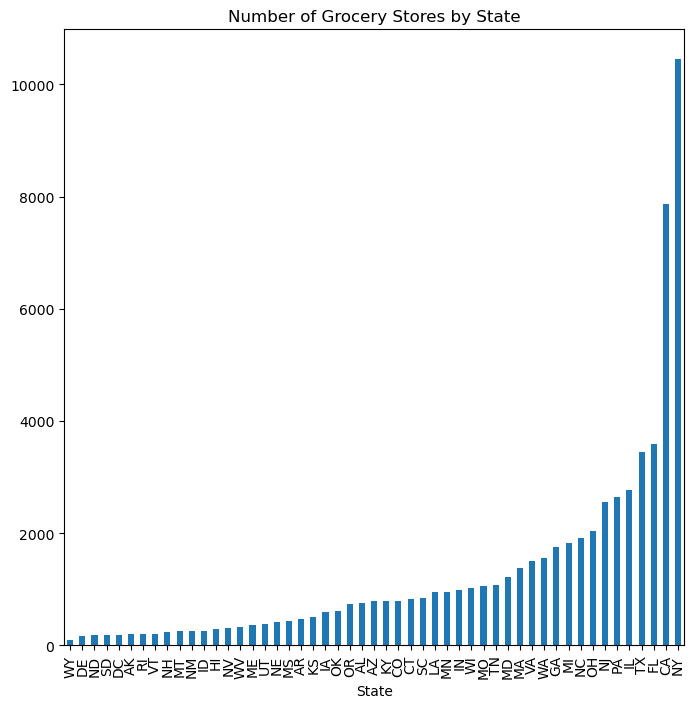

In [44]:
plt.figure(figsize=(8,8))
groc_by_state = df.groupby("State")['GROC16'].sum().sort_values(ascending=True)
groc_by_state.plot(kind="bar", title="Number of Grocery Stores by State")
plt.show()

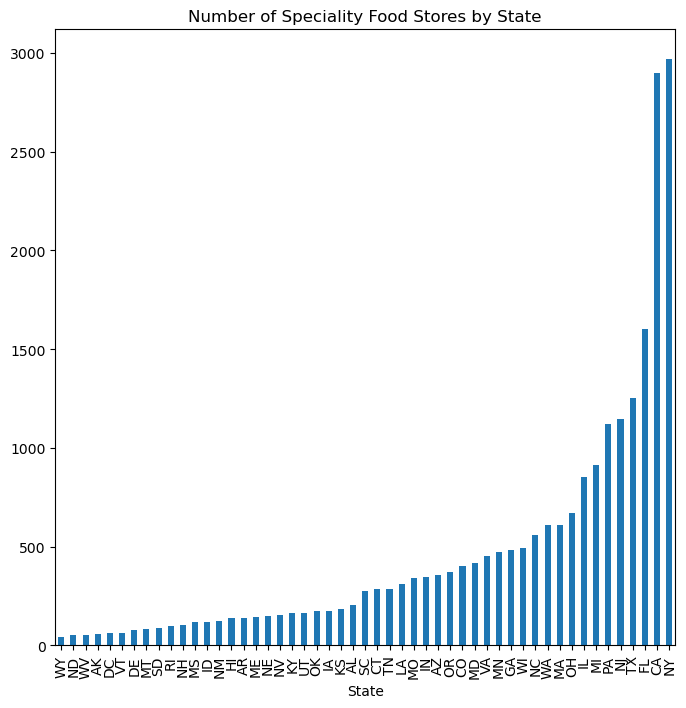

In [45]:
plt.figure(figsize=(8,8))
spec_by_state = df.groupby("State")['SPECS16'].sum().sort_values(ascending=True)
spec_by_state.plot(kind="bar", title="Number of Speciality Food Stores by State")
plt.show()

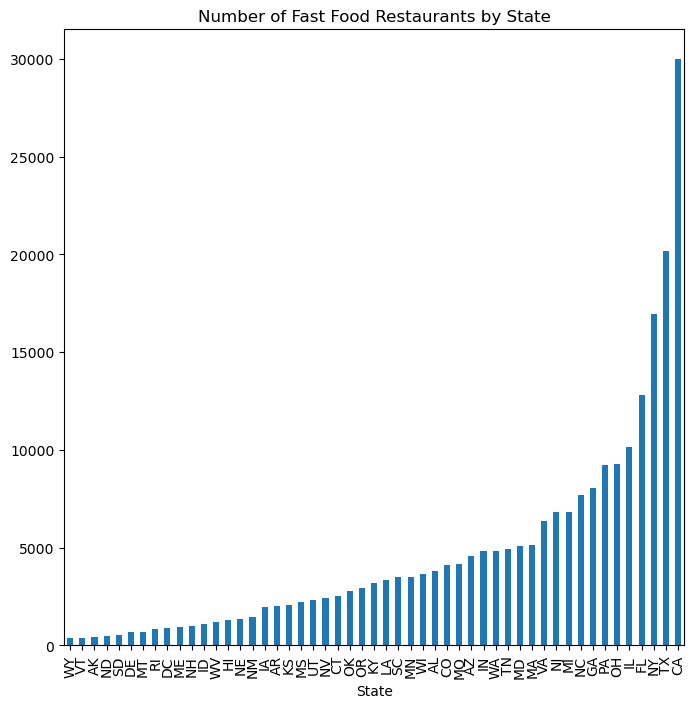

In [46]:
plt.figure(figsize=(8,8))
ff_by_state = df.groupby("State")['FFR16'].sum().sort_values(ascending=True)
ff_by_state.plot(kind="bar", title="Number of Fast Food Restaurants by State")
plt.show()

In [47]:
restaurants_by_state = df.groupby('State')[['FFR16','FSR16']].sum()
restaurants_by_state.head()

,FFR16,FSR16
State,,
AK,421,578
AL,3822,2821
AR,2014,2015
AZ,4585,4157
CA,29995,30798


<Figure size 2000x2000 with 0 Axes>

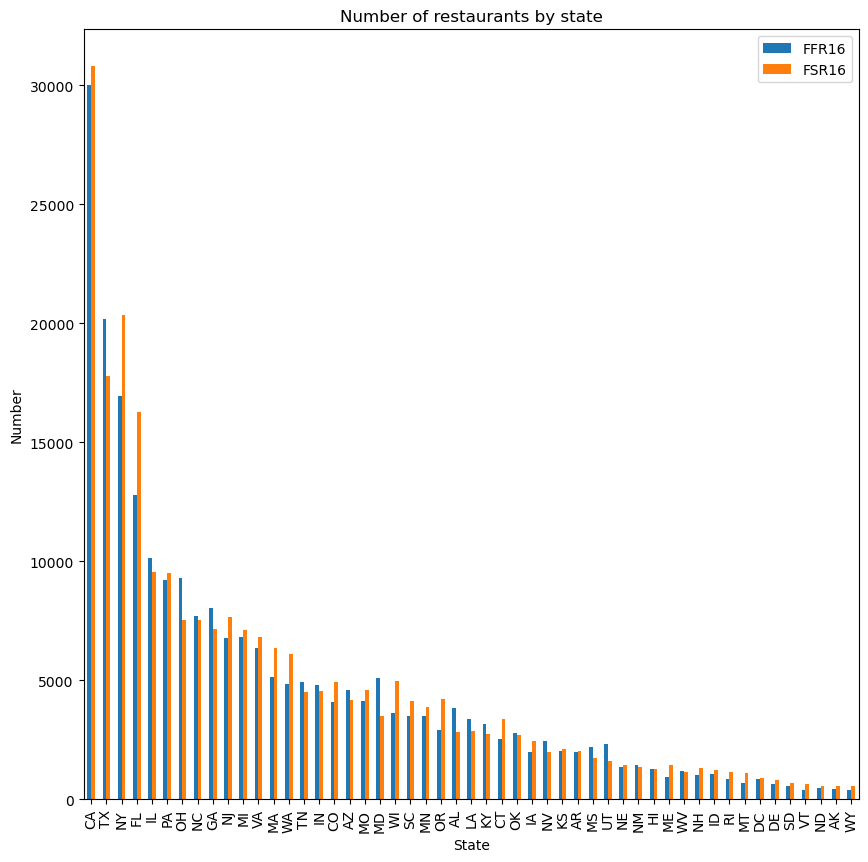

In [48]:
plt.figure(figsize=(20,20))
(restaurants_by_state.reindex(index=restaurants_by_state.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of restaurants by state'))
plt.xlabel('State')
plt.ylabel('Number');

In [49]:
corr = df.corr(numeric_only=True)

In [50]:
abs_corr = corr.abs()

In [51]:
s = abs_corr.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = so[so > 0.6]
so = so[so < 1.0]

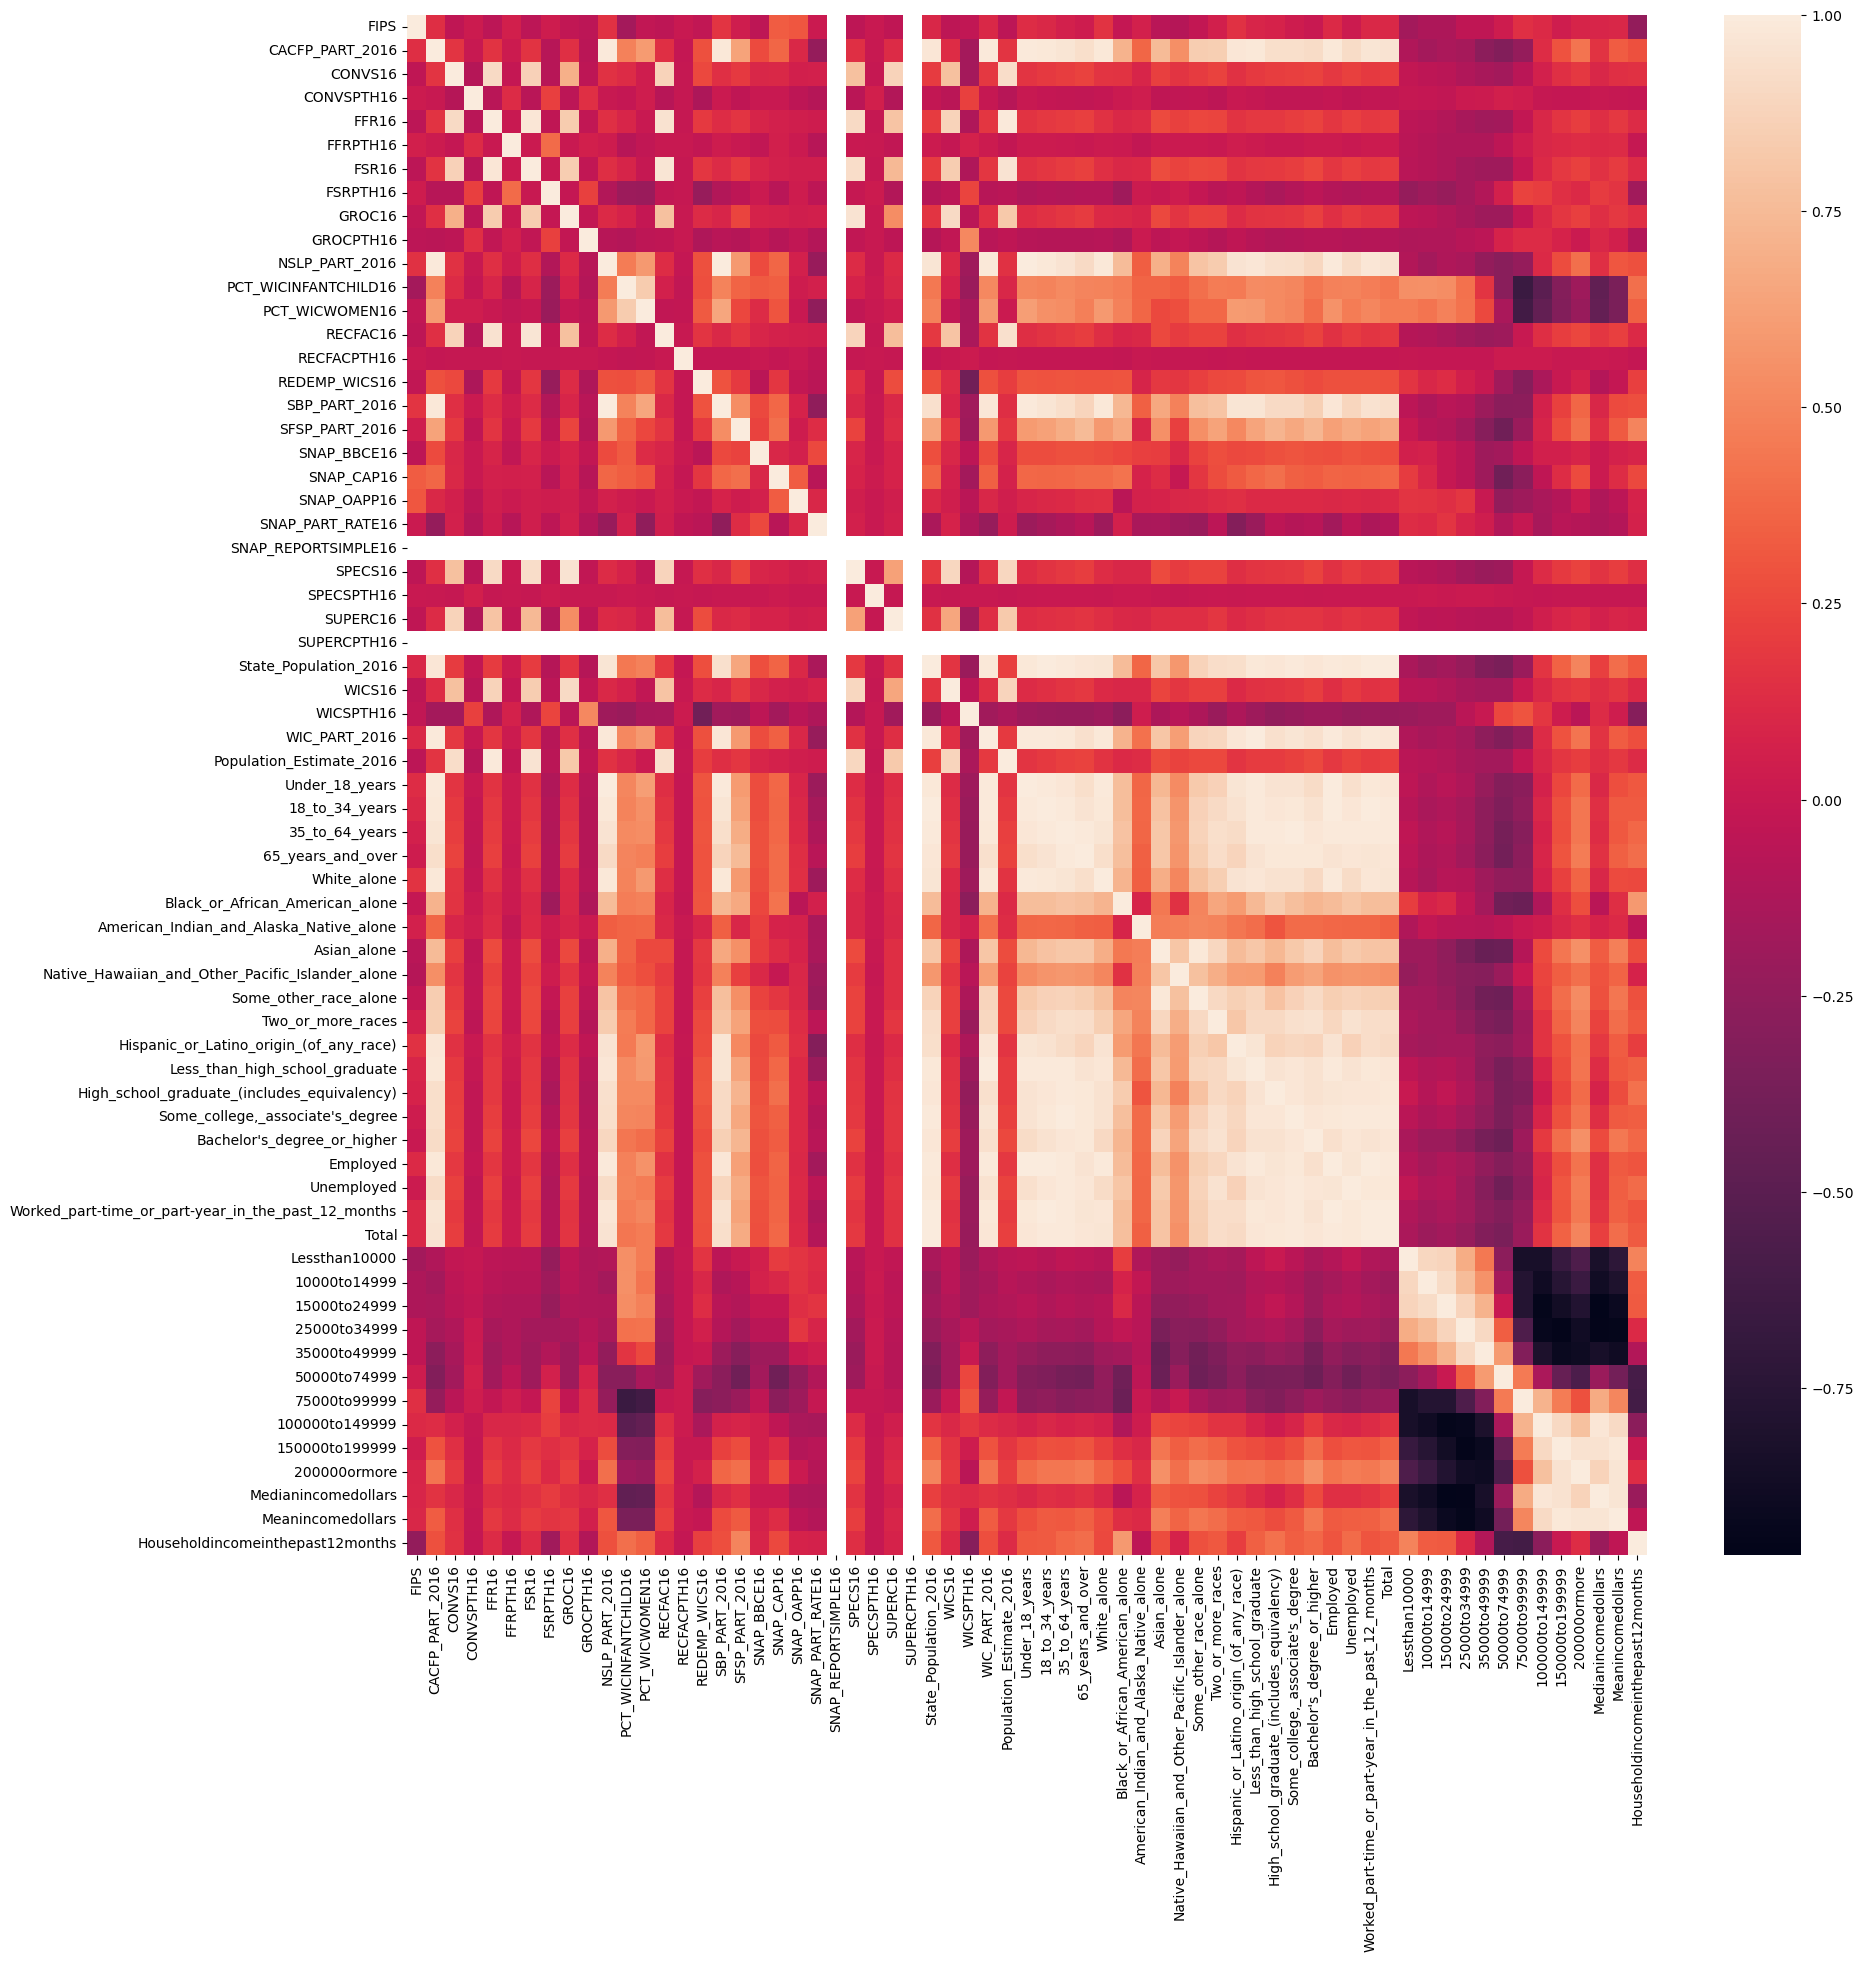

In [52]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

In [53]:
sorted_correlation = pd.DataFrame(so)
sorted_correlation.head()

,,0
Employed,18_to_34_years,0.998170
18_to_34_years,Employed,0.998170
State_Population_2016,Total,0.997794
Total,State_Population_2016,0.997794
18_to_34_years,Worked_part-time_or_part-year_in_the_past_12_months,0.997167


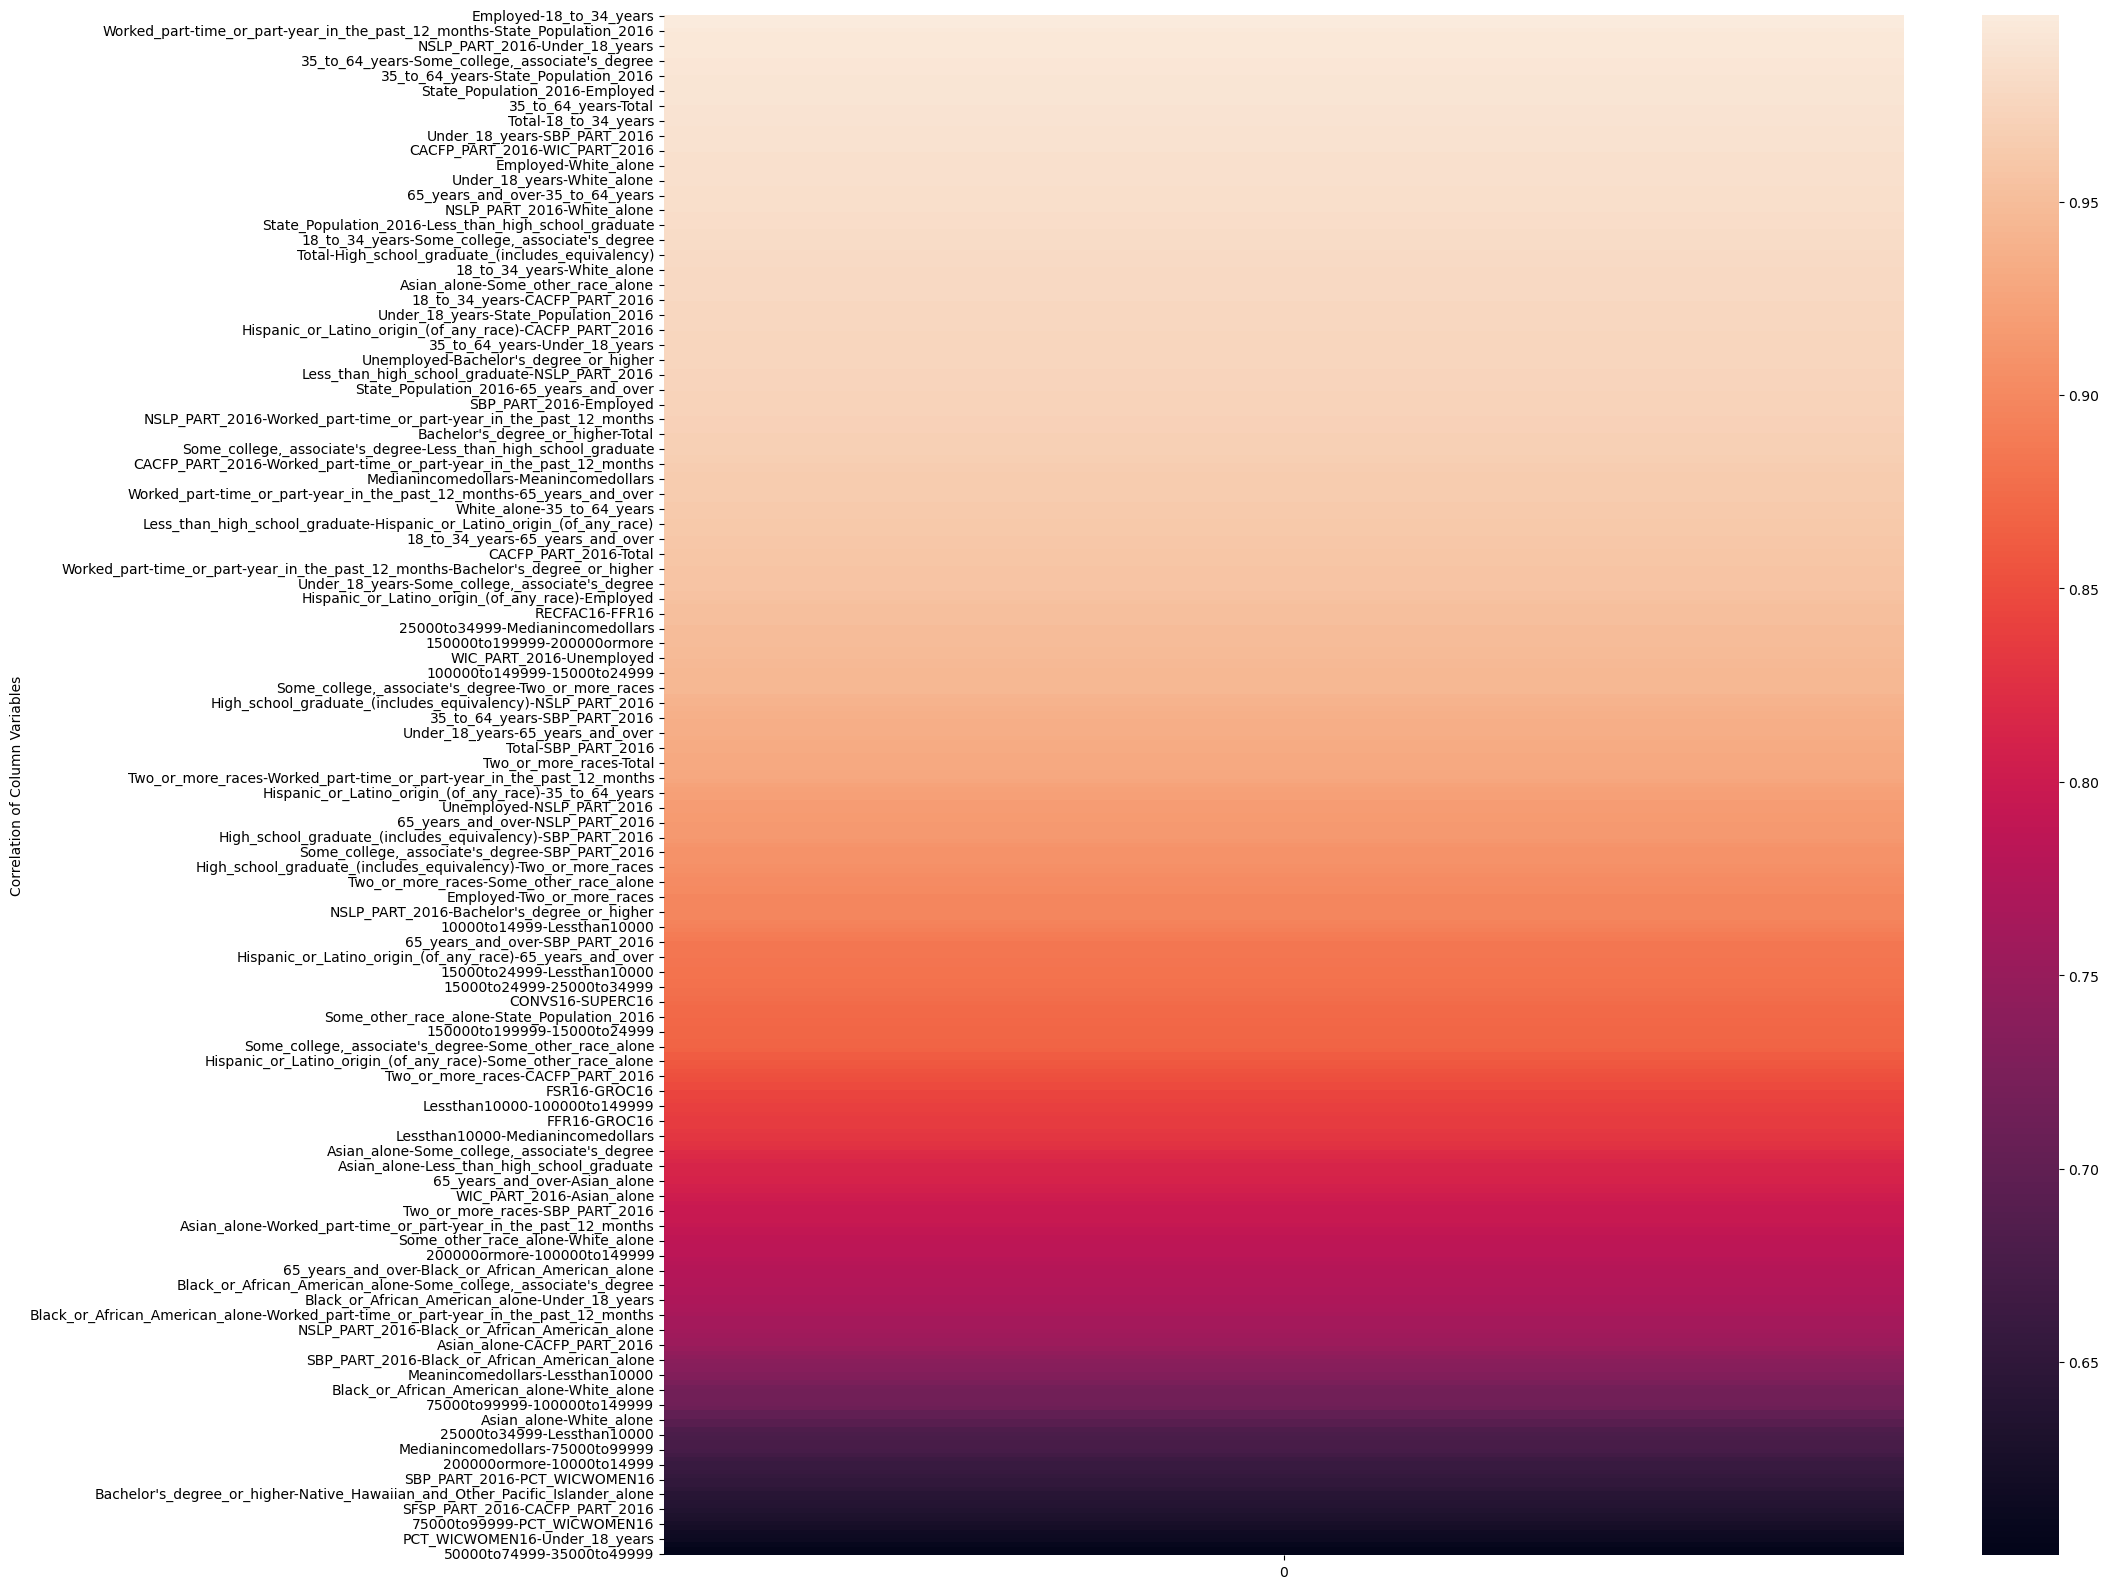

In [54]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(sorted_correlation, annot=False)
plt.ylabel('Correlation of Column Variables')
plt.show()

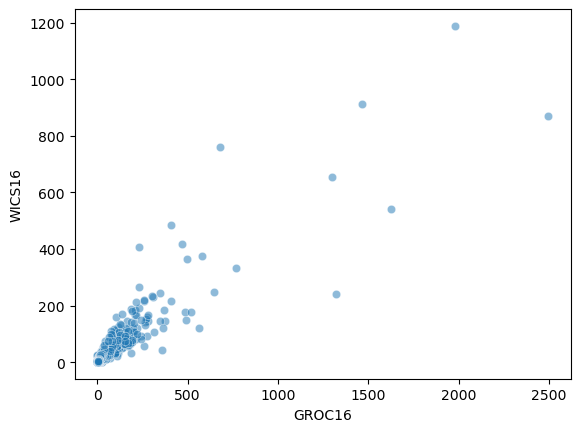

In [55]:
# Plot POVRATE15 against Median Household Income 2015
_ = sns.scatterplot(data=df, x='GROC16', y='WICS16', alpha=0.5)
plt.show()

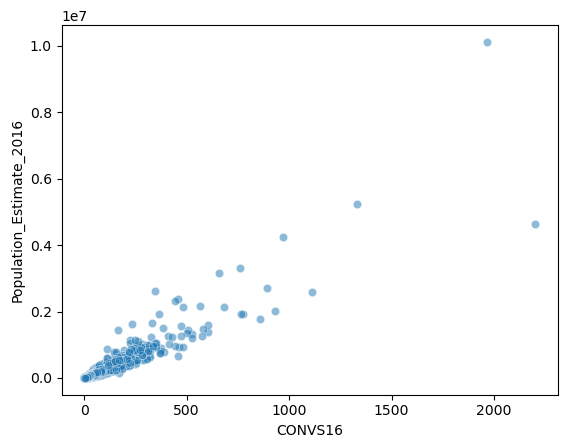

In [56]:
# Plot POVRATE15 against Median Household Income 2015
_ = sns.scatterplot(data=df, x='CONVS16', y='Population_Estimate_2016', alpha=0.5)
plt.show()

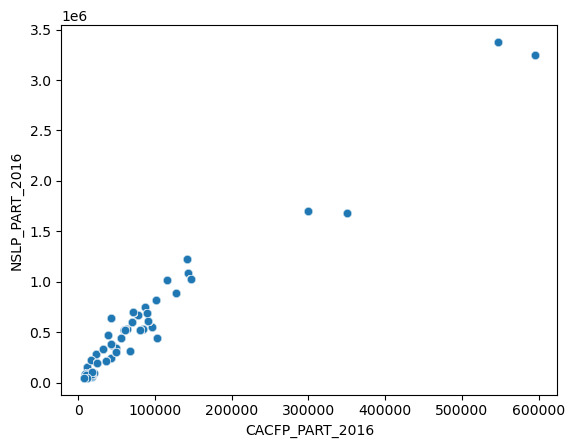

In [57]:
# Plot POVRATE15 against Median Household Income 2015
_ = sns.scatterplot(data=df, x='CACFP_PART_2016', y='NSLP_PART_2016', alpha=0.5)
plt.show()